# Machine Learning Project Concerning Drug Abuse

Machine learning project by:
Altai Feizi, Lukas Frey, Yann Leymann

## Desired Tastk
- Building a model to predict the probability of drug abuse
- Use the Drug consumption (quantified) dataset containing:
    - Sociodemographic attributes about the participants
    - Information about the specific Drugs they used

![Drugs](graphic/Drugs.png)

## 1. The Big Picture
The objective is to predict a probability for abuse of the given substances. The dataset contains information on 19 drugs, and for each of them, we require a corresponding probability. Thus it would be a Multiclassification Task.

If the model works as planned it could be used to prevent drug abuse by handling people who are at risk at a young age.

In [1]:
import pandas as pd

df = pd.read_csv('data/drug_consumption.csv',encoding="latin-1")
df = df.rename(columns={df.columns[0]: 'ID'})
df1 = df.iloc[:,:13]
df2 = df.iloc[:, 13:]
copy_df = df.copy() 
c_df1 = copy_df.iloc[:,:13]
c_df2 = copy_df.iloc[:, 13:]
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [3]:
df['Age'] = df['Age'].replace(-0.95197, '18-24')
df['Age'] = df['Age'].replace(-0.07854, '25-34')
df['Age'] = df['Age'].replace(0.49788, '35-44')
df['Age'] = df['Age'].replace(1.09449, '45-54')
df['Age'] = df['Age'].replace(1.82213, '55-64')
df['Age'] = df['Age'].replace(2.59171, '65+')

df['Gender'] = df['Gender'].replace(-0.48246, 'Male')
df['Gender'] = df['Gender'].replace(0.48246, 'Female')

df['Education'] = df['Education'].replace(-2.43591, '< 16')
df['Education'] = df['Education'].replace(-1.73790, '16')
df['Education'] = df['Education'].replace(-1.43719, '17')
df['Education'] = df['Education'].replace(-1.22751, '18')
df['Education'] = df['Education'].replace(-0.61113, 'University student')
df['Education'] = df['Education'].replace(-0.05921, 'Cert./Dipl.')
df['Education'] = df['Education'].replace(0.45468, 'University Deg.')
df['Education'] = df['Education'].replace(1.16365, 'Masters Deg.')
df['Education'] = df['Education'].replace(1.98437, 'Doc. Deg.')

df['Country'] = df['Country'].replace(-0.09765, 'Australia')
df['Country'] = df['Country'].replace(0.24923, 'Canada')
df['Country'] = df['Country'].replace(-0.46841, 'New Zealand')
df['Country'] = df['Country'].replace(-0.28519, 'Other')
df['Country'] = df['Country'].replace(0.21128, 'Republic of Ireland')
df['Country'] = df['Country'].replace(0.96082, 'UK')
df['Country'] = df['Country'].replace(-0.57009, 'USA')

df['Ethnicity'] = df['Ethnicity'].replace(-0.50212, 'Asian')
df['Ethnicity'] = df['Ethnicity'].replace(-1.10702, 'Black')
df['Ethnicity'] = df['Ethnicity'].replace(1.90725, 'Black/Asian')
df['Ethnicity'] = df['Ethnicity'].replace(0.12600, 'White/Asian')
df['Ethnicity'] = df['Ethnicity'].replace(-0.22166, 'White/Black')
df['Ethnicity'] = df['Ethnicity'].replace(0.11440, 'Other')
df['Ethnicity'] = df['Ethnicity'].replace(-0.31685, 'White')

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Cert./Dipl.,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doc. Deg.,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Cert./Dipl.,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters Deg.,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doc. Deg.,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


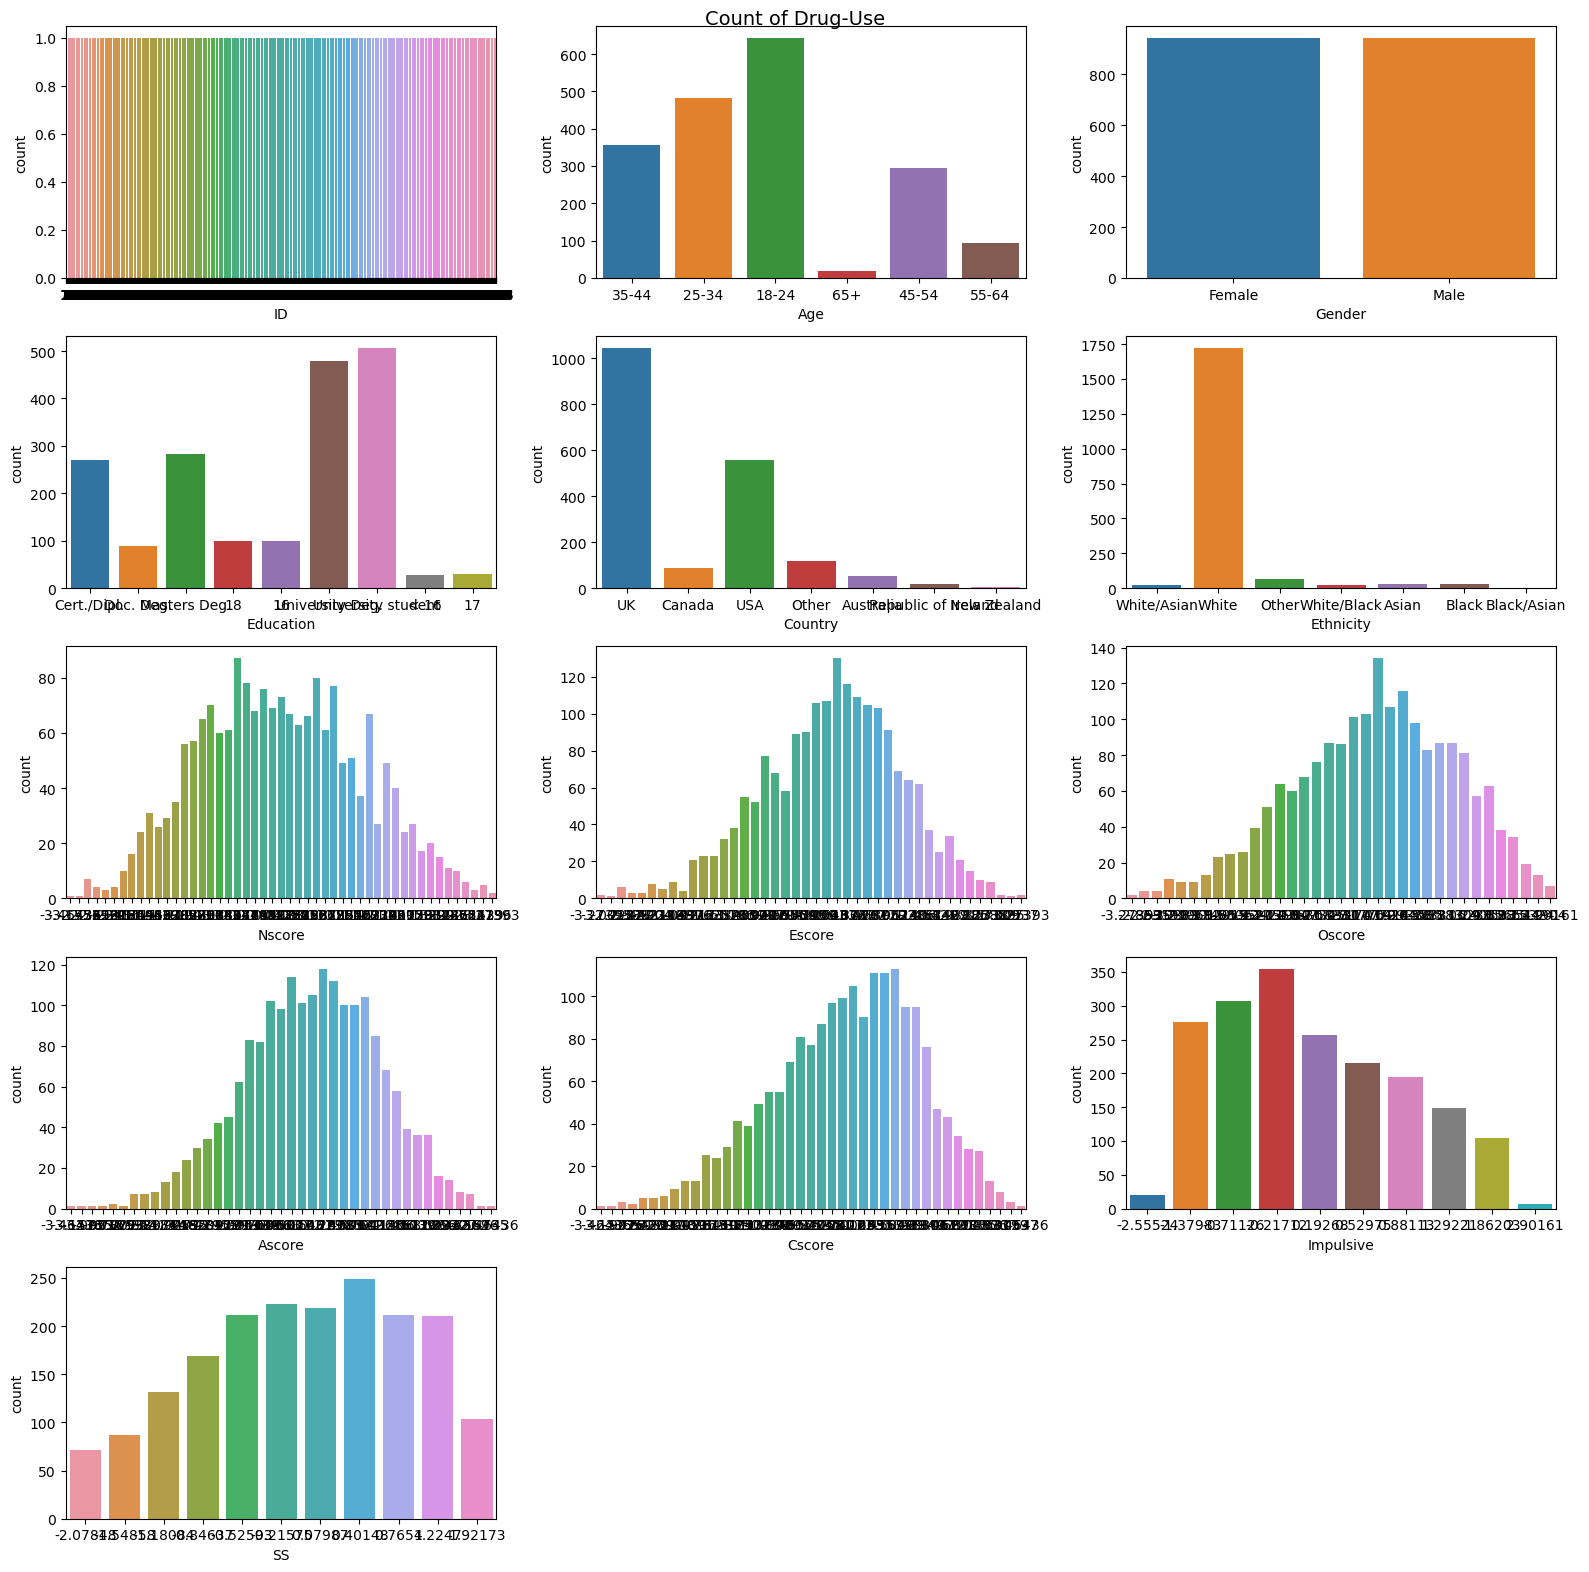

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = df1.columns[:13]  # Nur die ersten 13 Spalten verwenden

num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Count of Drug-Use", fontsize=14)

for i in range(num_rows):
    for j in range(num_cols):
        k = i * num_cols + j
        if k < len(columns):
            sns.countplot(x=columns[k], data=df, ax=axes[i][j])
        else:
            fig.delaxes(axes[i][j])

plt.tight_layout()
plt.show()

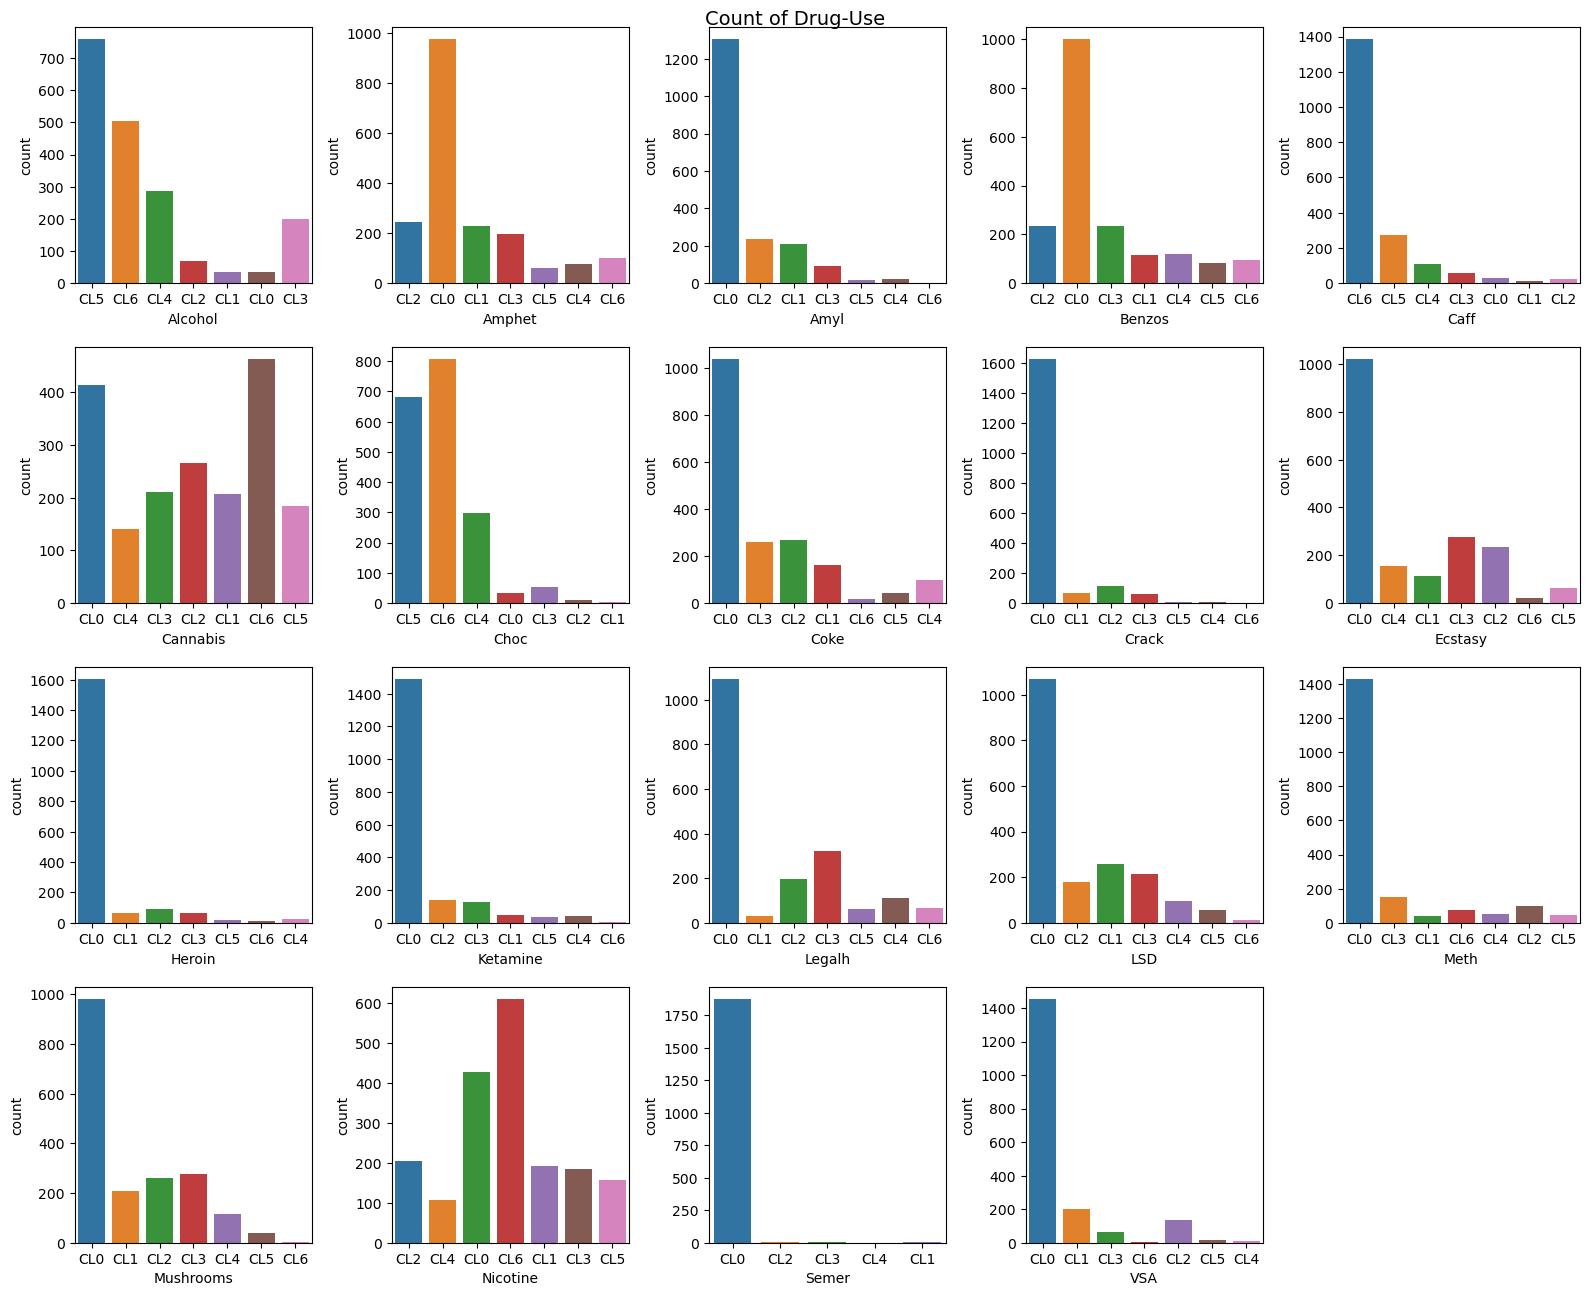

In [5]:
columns = df2.columns

num_rows = 5
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Count of Drug-Use", fontsize=14)

for i in range(num_rows):
    for j in range(num_cols):
        k = i * num_cols + j
        if k < len(columns):
            sns.countplot(x=columns[k], data=df, ax=axes[i][j])
        else:
            fig.delaxes(axes[i][j])

plt.tight_layout()
plt.show()

In [6]:
attributes_to_update = c_df2.columns

for attribute in attributes_to_update:
    copy_df.loc[df[attribute] == "CL0", attribute] = 0
    copy_df.loc[df[attribute].isin(["CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]), attribute] = 1

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Cert./Dipl.,UK,White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doc. Deg.,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Cert./Dipl.,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters Deg.,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doc. Deg.,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(copy_df, test_size=0.2, random_state=42)

In [8]:
corr_matrix = copy_df.corr()
#selected_columns = df1.columns[:13].tolist() + ['Cannabis']
#for i in df1.columns:
#    print(corr_matrix[i].sort_values(ascending=False),'\n')

cannabis_correlations = corr_matrix.loc['Cannabis']
print(cannabis_correlations)

ID           0.096607
Age         -0.266272
Gender      -0.229856
Education   -0.111820
Country     -0.357910
Ethnicity    0.135782
Nscore       0.098475
Escore      -0.048587
Oscore       0.307601
Ascore      -0.143676
Cscore      -0.239013
Impulsive    0.252887
SS           0.357194
Alcohol      0.149861
Amphet       0.462418
Amyl         0.305886
Benzos       0.305562
Caff         0.130437
Cannabis     1.000000
Choc         0.059458
Coke         0.437227
Crack        0.210929
Ecstasy      0.456377
Heroin       0.217633
Ketamine     0.256969
Legalh       0.419216
LSD          0.444663
Meth         0.266274
Mushrooms    0.477128
Nicotine     0.518081
Semer        0.034581
VSA          0.254334
Name: Cannabis, dtype: float64


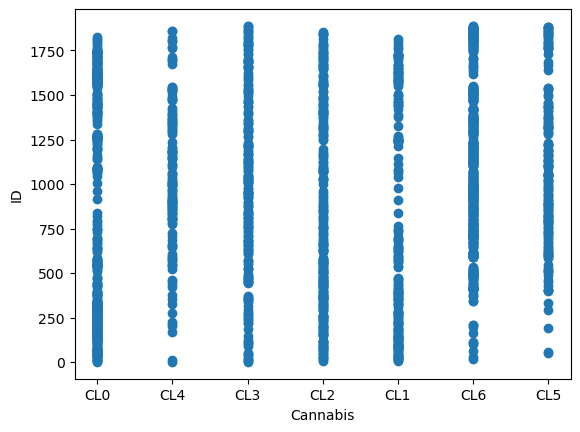

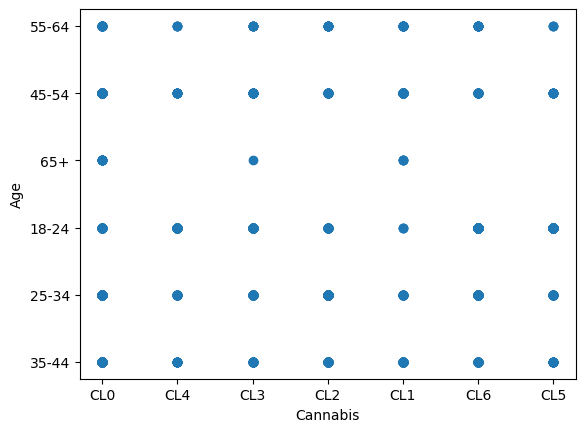

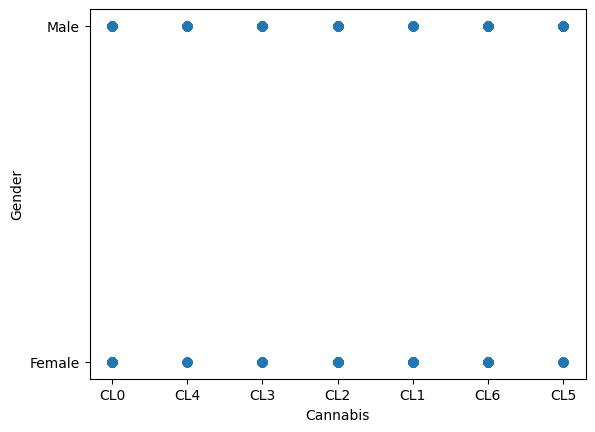

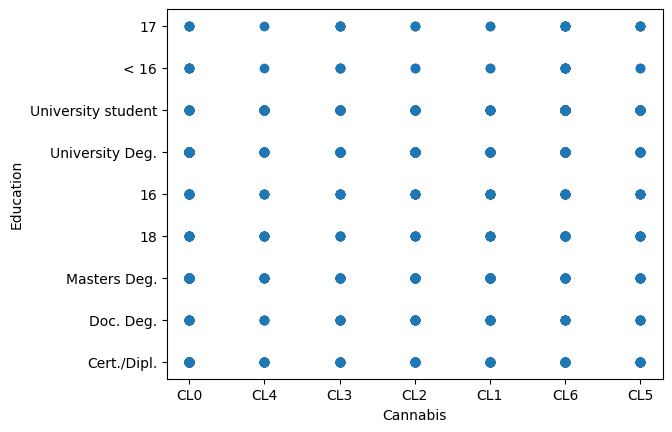

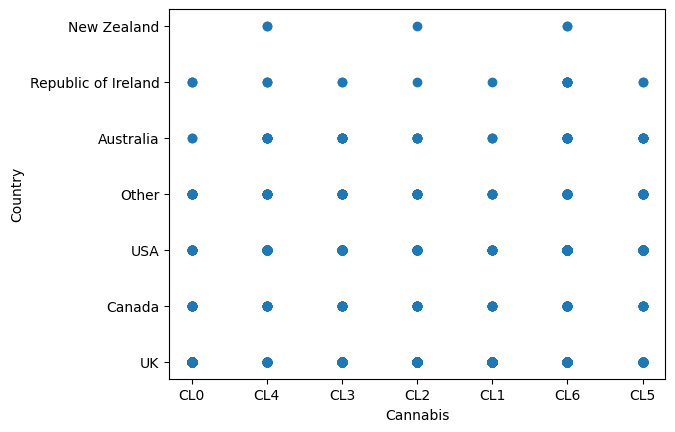

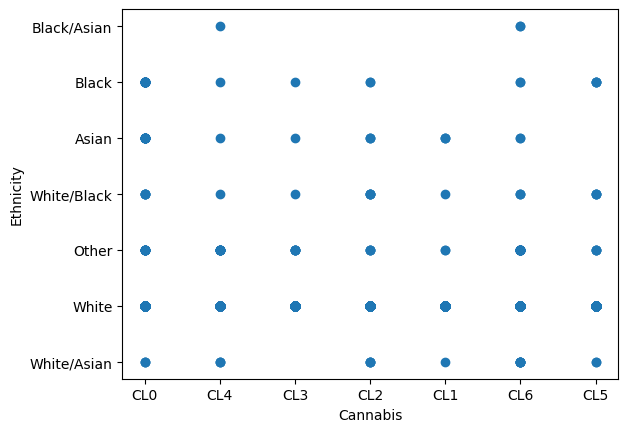

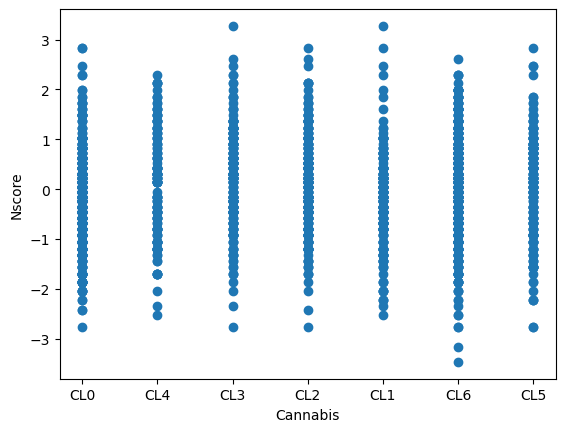

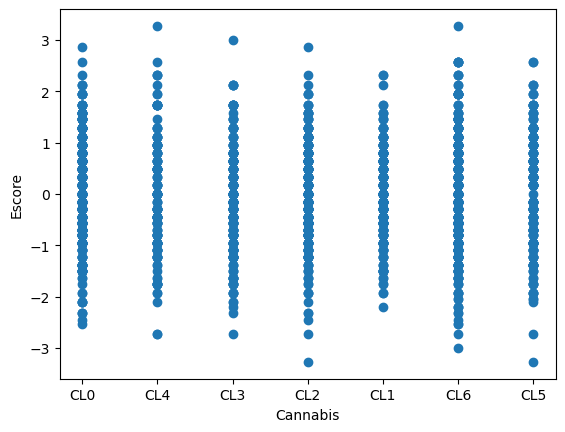

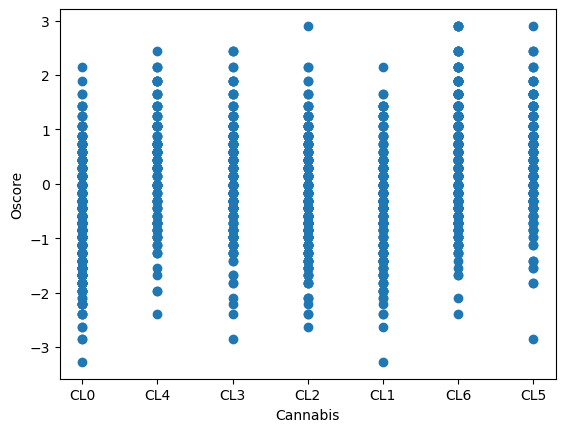

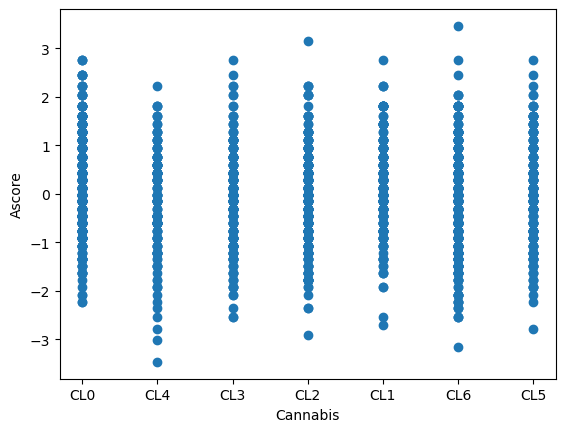

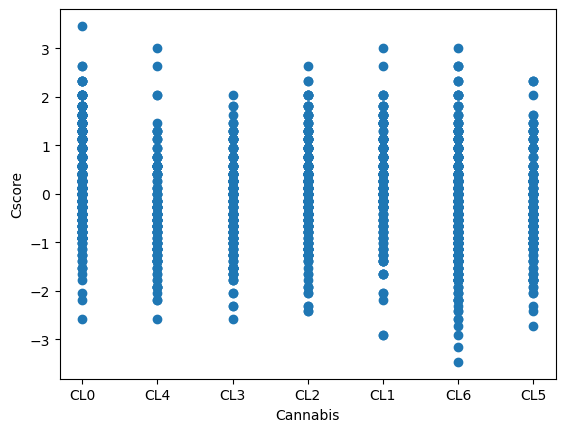

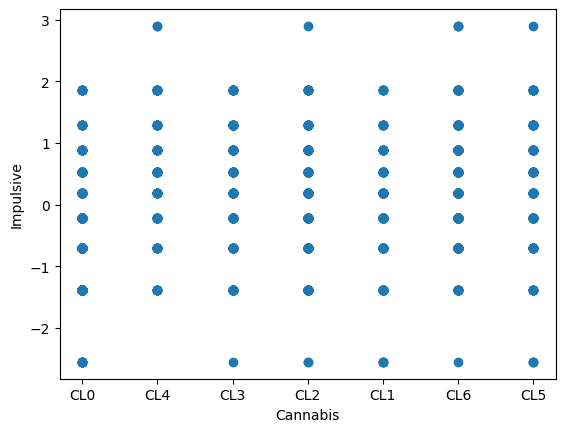

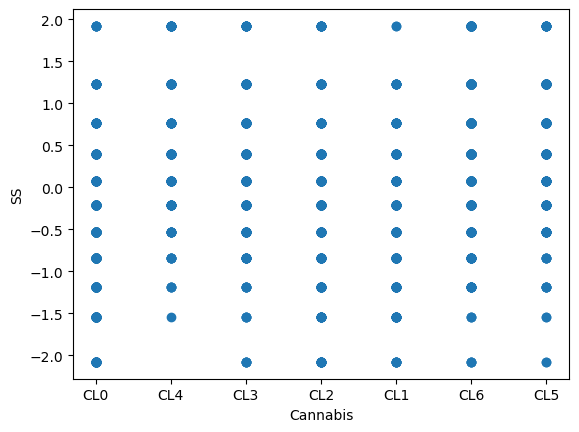

In [9]:
from pandas.plotting import scatter_matrix

attributes = df1.columns
attribute_to_plot = 'Cannabis'
for attribute in attributes:
    if attribute != attribute_to_plot:
        plt.scatter(df[attribute_to_plot], df[attribute])
        plt.xlabel(attribute_to_plot)
        plt.ylabel(attribute)
        plt.show()